In [1]:
import cv2
import numpy as np
import dlib
import face_recognition
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import glob
import tensorflow as tf


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
lip_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')



In [2]:
# CAM_LINK = 'http://192.168.8.100:4747/video'

cap = cv2.VideoCapture(1)

while cap.isOpened():
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     if(cv2.waitKey(1) & 0xFF == ord('p')):
    faces = detector(gray)
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

        landmarks = predictor(gray, face)

        # face : 48 - 68
        # forehead : 17 - 26
        # left eye: 42 - 47
        # right eye: 36 - 41

        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            cv2.circle(frame, (x, y), 4, (255, 0, 255), -1)
#             print(f' ({x},{y}) ', end = '')
#         print()

    cv2.imshow("Frame", frame)

    if(cv2.waitKey(1) & 0xFF == ord('q')):
        cap.release()
        cv2.destroyAllWindows()
    
#     key = cv2.waitKey(1)
#     if key == 27:
#         break


In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [6]:
CAM_LINK = 'http://192.168.8.100:4747/video'

cap = cv2.VideoCapture(0)

while cap.isOpened():
    _, img = cap.read()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    face_frame = face_cascade.detectMultiScale(gray, 1.3, 5)
    
#     for (x,y,w,h) in faces:
#         cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = img[y:y+h, x:x+w]
#         eyes = eye_cascade.detectMultiScale(roi_gray)
#         for (ex,ey,ew,eh) in eyes:
#             cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    try:
        (x,y,w,h) = face_frame[0]
        face_img = img[y:y+h, x:x+w]
        
        gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)
        for face in faces:
            x1 = face.left()
            y1 = face.top()
            x2 = face.right()
            y2 = face.bottom()
            #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

            landmarks = predictor(gray, face)

            # face : 48 - 68
            # forehead : 17 - 26
            # left eye: 42 - 47
            # right eye: 36 - 41

            for n in range(0, 68):
                x = landmarks.part(n).x
                y = landmarks.part(n).y
                cv2.circle(face_img, (x, y), 4, (255, 0, 255), -1)
            
#             for n in range(17, 29):
#                 x = landmarks.part(n).x
#                 y = landmarks.part(n).y
#                 cv2.circle(face_img, (x, y), 4, (255, 0, 255), -1)
                
        cv2.namedWindow('FaceFrame', cv2.WINDOW_NORMAL)
        
        cv2.resizeWindow('FaceFrame', 500, 500)
        cv2.imshow("FaceFrame", face_img)
        cv2.imshow("original", img)
    except:
        cv2.destroyWindow("FaceFrame")
        pass
        
#     cv2.imshow("Frame", img)
        
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        cap.release()
        cv2.destroyAllWindows()

In [10]:
tst_img = cv2.imread('test pictures/trump.jpg')


tst_img = cv2.resize(tst_img, (0,0), fx=0.5, fy=0.5) 

gray = cv2.cvtColor(tst_img, cv2.COLOR_BGR2GRAY)

faces = detector(gray)

for face in faces:
    print('here')
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    
    landmarks = predictor(gray, face)

    for n in range(68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(tst_img, (x, y), 4, (255, 0, 255), -1)


while True:
    cv2.imshow('temp', tst_img)
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        cv2.destroyAllWindows()
        break

here


In [63]:
df = pd.read_csv('training.csv')
df['Image'] = df['Image'].apply(lambda i: np.fromstring(i, sep=' '))

In [65]:
df.dropna(inplace=True)

In [68]:
img = df.iloc[0,-1]

In [69]:
img = img.reshape(-1, 96, 96, 1)

In [ ]:
img.shape

In [72]:
img = plt.imread(img)

ValueError: fname must be a PathLike or file handle

In [7]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

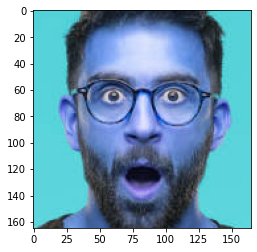

In [53]:
for pic in os.listdir("C:/Users/hamma/Desktop/FYP/face landmarks/images/test2/surprise"):
    try:
        img = cv2.imread(f"C:/Users/hamma/Desktop/FYP/face landmarks/images/test2/surprise/{pic}")
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.9)
        for (x, y, w, h) in faces:
            f_gray = gray[y:y + h, x:x + w]
            f_color = img[y:y + h, x:x + w]

            cv2.circle(f_color, (x, y), 4, (255, 0, 0), -1)

#             eyes = eye_cascade.detectMultiScale(f,1.9)#, flags=cv2.CASCADE_SCALE_IMAGE)

#             if len(eyes)!=2:
#         #         continue
#                 pass

#             for (x, y, w, h) in eyes:
#                 cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            plt.figure()
            plt.imshow(f_color)
        break
    except Exception as ex:
        print(ex)

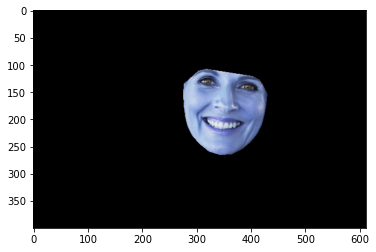

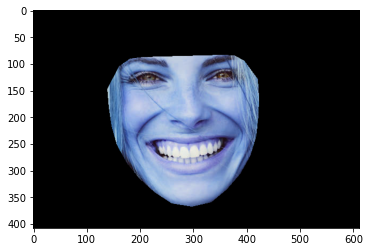

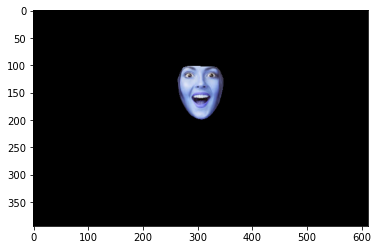

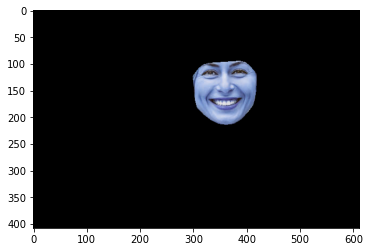

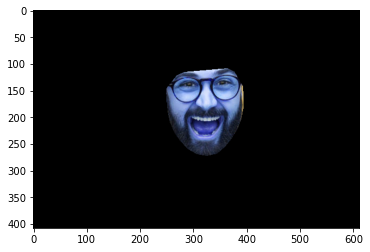

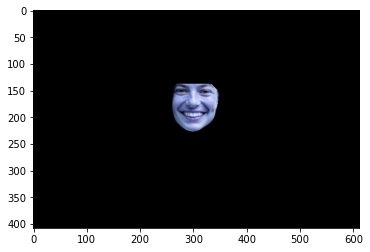

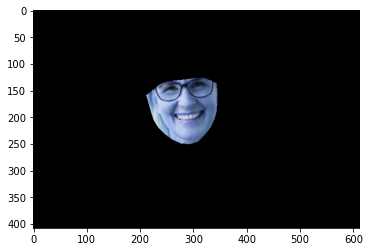

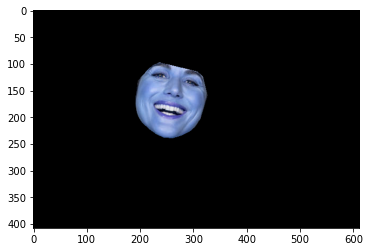

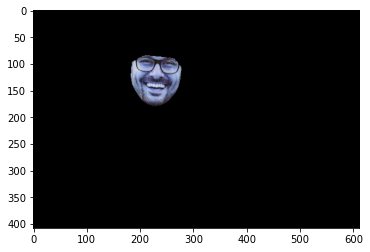

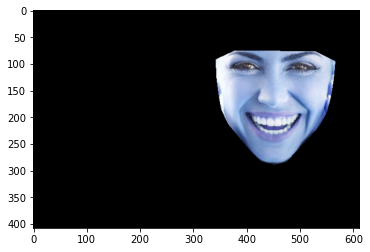

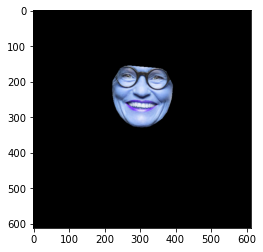

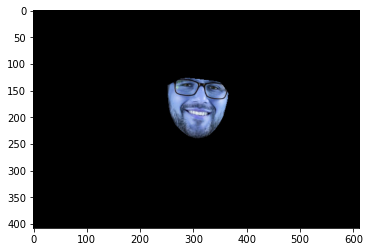

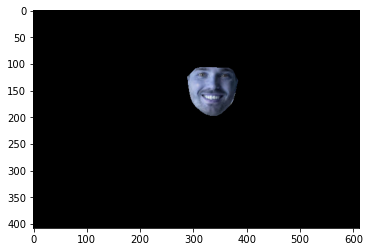

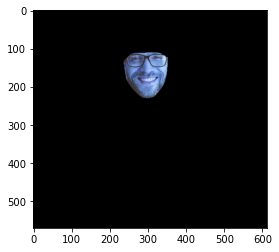

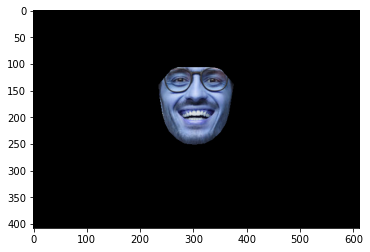

In [6]:
for pic in os.listdir("C:/Users/hamma/Desktop/FYP/face landmarks/images/test2/joy"):
    landmarks_positions = []
    img = cv2.imread(f"C:/Users/hamma/Desktop/FYP/face landmarks/images/test2/joy/{pic}")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

        landmarks = predictor(gray, face)

        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            landmarks_positions.append((x, y))
            
            mask = np.zeros_like(gray)
            
            points = np.array(landmarks_positions, np.int32)
            convexhull = cv2.convexHull(points)
            cv2.fillConvexPoly(mask, convexhull, 255)
            
            face_image_1 = cv2.bitwise_and(img, img, mask=mask)
            
    
    plt.figure()
    plt.imshow(face_image_1, cmap='gray')

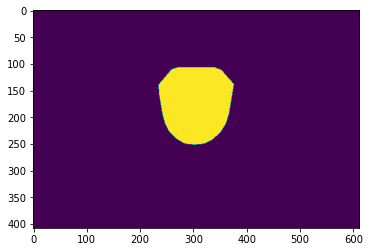

In [8]:
plt.imshow(mask)

In [23]:
img = np.zeros((500, 500, 3), dtype='uint8')
img[100:200, 450:490, 1:2] = 0,255,0

# cv2.imshow('image', img)
plt.imshow(img)
plt.grid(True)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: could not broadcast input array from shape (3) into shape (100,40,1)

In [12]:
img.shape

(500, 500)

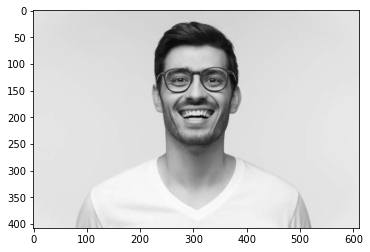

In [49]:
for n in range(48, 60):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
plt.imshow(gray, cmap='gray')

In [7]:
landmarks.part(0)

point(57, 125)

In [6]:

predictor_path = "shape_predictor_68_face_landmarks.dat"
faces_folder_path = "C:/Users/hamma/Desktop"    #"C:/Users/hamma/Desktop/FYP/face landmarks/images/test/neutral"

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)
win = dlib.image_window()
i = 0
for f in glob.glob(os.path.join(faces_folder_path, "*.jpg")):
    print("Processing file: {}".format(f))
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

    # to clear the previous overlay. Useful when multiple faces in the same photo
    win.clear_overlay()

    # to show the image
    win.set_image(img)

    # Ask the detector to find the bounding boxes of each face. The 1 in the
    # second argument indicates that we should upsample the image 1 time. This
    # will make everything bigger and allow us to detect more faces.
    dets = detector(img, 1)
    print("Number of faces detected: {}".format(len(dets)))
    for k, d in enumerate(dets):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        # Get the landmarks/parts for the face in box d.
        shape = predictor(img, d)
        i += 1
        # The next lines of code just get the coordinates for the mouth
        # and crop the mouth from the image.This part can probably be optimised
        # by taking only the outer most points.
        xmouthpoints = [shape.part(x).x for x in range(0,68)]
        ymouthpoints = [shape.part(x).y for x in range(0,68)]
        maxx = max(xmouthpoints)
        minx = min(xmouthpoints)
        maxy = max(ymouthpoints)
        miny = min(ymouthpoints) 

        # to show the mouth properly pad both sides
        pad = 0
        # basename gets the name of the file with it's extension
        # splitext splits the extension and the filename
        # This does not consider the condition when there are multiple faces in each image.
        # if there are then it just overwrites each image and show only the last image.
        filename = os.path.splitext(os.path.basename(f))[0]

        crop_image = img[miny-pad:maxy+pad,minx-pad:maxx+pad]
        cv2.imwrite('q.jpg',crop_image)
#         cv2.imshow('mouth',crop_image)
        # The mouth images are saved in the format 'mouth1.jpg, mouth2.jpg,..
        # Change the folder if you want to. They are stored in the current directory
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        win.add_overlay(shape)
    break
    win.add_overlay(dets)

Processing file: C:/Users/hamma/Desktop\q.jpg
Number of faces detected: 1
Detection 0: Left: 58 Top: 280 Right: 724 Bottom: 946


Text(0.5, 1.0, 'surprise')

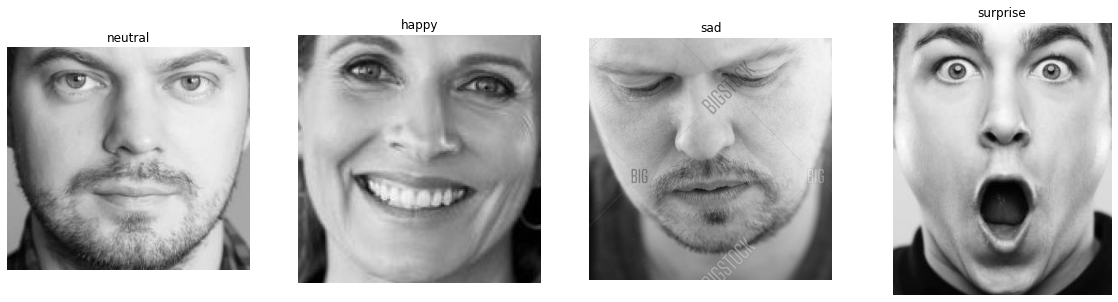

In [48]:
img1 = plt.imread('1.jpg')
img2 = plt.imread('2.jpg')
img3 = plt.imread('3.jpg')
img4 = plt.imread('4.jpg')


fig, ax = plt.subplots(ncols=4, figsize=(20,5))
ax[0].imshow(img3, cmap="gray")
ax[1].imshow(img1, cmap="gray")
ax[2].imshow(img4, cmap="gray")
ax[3].imshow(img2, cmap="gray")
ax[0].axis(False)
ax[1].axis(False)
ax[2].axis(False)
ax[3].axis(False)
ax[0].set_title('neutral')
ax[1].set_title('happy')
ax[2].set_title('sad')
ax[3].set_title('surprise')

In [3]:
from PIL import Image
from tensorflow.keras.preprocessing import image

In [4]:
model = tf.keras.models.load_model('saveModel') 

In [6]:
def lableToName(label: str):
    if label==0:
        return 'joy'
    elif label==1:
        return 'neutral'
    elif label==2:
        return 'surprise'

In [119]:
img_path = 'images/final/surprise/'
for i in os.listdir(img_path):
    img = image.load_img(img_path+i, target_size=(224, 224), color_mode = "grayscale")
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    print(np.argmax(model.predict(img_batch)))

1
1
1
0
0
1
2
0
0
1
0
0
2
1
0
1
0
0
2
1
1
2
1
0
1
1
0
0
2
2
1
2
1
1
2
2
1
1
0
0
0
1
0
2
1
1
1
0
0
2
0
1
0
2
1
0
0
0
0
2
2
2
0
0
1
2
2
0
1
0
1
1
1


2


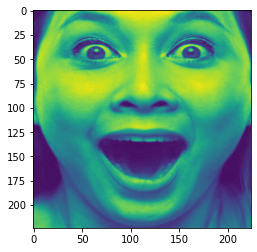

In [79]:
img = cv2.imread('images/test2/surprise/0_32.jpg', cv2.IMREAD_GRAYSCALE)
dets = detector(img)
for k, d in enumerate(dets):
    shape = predictor(img, d)
    xmouthpoints = [shape.part(x).x for x in range(0,68)]
    ymouthpoints = [shape.part(x).y for x in range(0,68)]
    maxx = max(xmouthpoints)
    minx = min(xmouthpoints)
    maxy = max(ymouthpoints)
    miny = min(ymouthpoints) 
    
    crop_image = img[miny:maxy,minx:maxx]
    crop_image = cv2.resize(crop_image, (224,224))
    plt.imshow(crop_image)
    
#     img = image.load_img(crop_image, target_size=(224, 224), color_mode = "grayscale")
    img_array = image.img_to_array(crop_image)
    img_batch = np.expand_dims(img_array, axis=0)
    print(np.argmax(model.predict(img_batch)))
    

In [108]:
video_capture = cv2.VideoCapture(1, cv2.IMREAD_GRAYSCALE)

while True:
    # Capture frame-by-frame
    ret, img_frame = video_capture.read()
    img_frame = cv2.cvtColor(img_frame, cv2.COLOR_BGR2GRAY) 
    
    
    try:
        dets = detector(img_frame)
    except:
        pass
    
    for k, d in enumerate(dets):
#         print(len(dets))
        shape = predictor(img, d)
        xmouthpoints = [shape.part(x).x for x in range(0,68)]
        ymouthpoints = [shape.part(x).y for x in range(0,68)]
        maxx = max(xmouthpoints)
        minx = min(xmouthpoints)
        maxy = max(ymouthpoints)
        miny = min(ymouthpoints) 

        crop_image = img_frame[miny:maxy,minx:maxx]
        crop_image = cv2.resize(crop_image, (224,224))
        
        cv2.imshow('face', crop_image)
        cv2.imshow('all_captured', img_frame)
    
        img_array = image.img_to_array(crop_image)
        img_batch = np.expand_dims(img_array, axis=0)
        emo = np.argmax(model.predict(img_batch))
        print(lableToName(emo))
    
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break

cv2.destroyAllWindows()

surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
s

surprise
surprise
surprise
surprise
surprise
surprise
surprise
joy
joy
joy
joy
joy
joy
joy
joy
surprise
joy
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
joy
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
joy
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
surprise
su

In [ ]:
image.array_to_img()